In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("498436.csv")
#df['Value'] = np.log(df['Value'])

In [3]:
df.head(5)

,Date,Value
0,7/8/2019 10:41,13.4
1,7/8/2019 10:59,0.0
2,7/8/2019 11:00,3.3
3,7/8/2019 11:00,25.5
4,7/8/2019 11:01,1.8


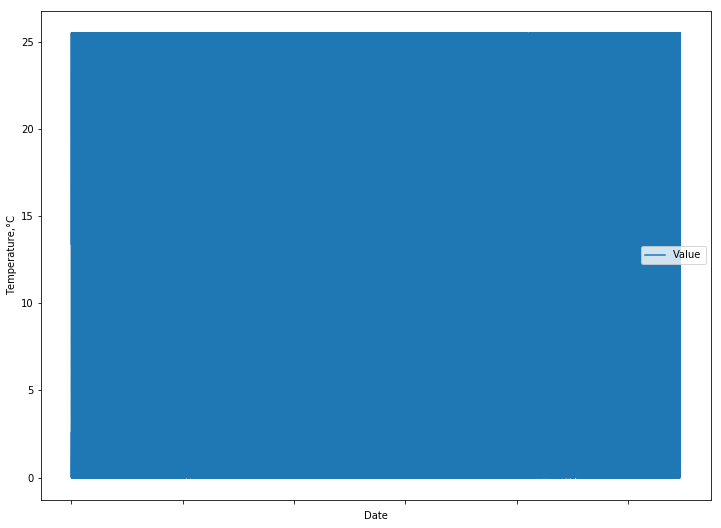

In [4]:
df.set_index('Date').plot(figsize=(12, 9))
plt.ylabel('Temperature,°C')
plt.xlabel('Date')
plt.show()

In [5]:
#df['Value'] = np.log(df['Value'])
#df.set_index('Date').plot(figsize=(12, 9))  
#plt.show()

In [6]:
df.dtypes

Date      object
Value    float64
dtype: object

In [7]:
df = df.rename(columns={'Date': 'ds','Value': 'y'})
df.head(5)

,ds,y
0,7/8/2019 10:41,13.4
1,7/8/2019 10:59,0.0
2,7/8/2019 11:00,3.3
3,7/8/2019 11:00,25.5
4,7/8/2019 11:01,1.8


In [8]:
model = Prophet(changepoint_prior_scale = 0.1) #0.01
model.fit(df)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
# future_data = model.make_future_dataframe(periods=20) 
future_data = model.make_future_dataframe(periods=720, freq = 'H') #850 count by hour Freq = 'H' (hour)-4320(6month)

In [10]:
forecast_data = model.predict(future_data)

In [11]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55399,2020-07-25 19:41:00,4.828234,-2.647750,12.945218
55400,2020-07-25 20:41:00,4.799552,-2.834211,12.547974
55401,2020-07-25 21:41:00,4.783568,-2.895304,13.034226
55402,2020-07-25 22:41:00,4.790261,-3.792404,12.628667
55403,2020-07-25 23:41:00,4.801492,-3.734238,12.933705


Text(0.5,33,'Date')

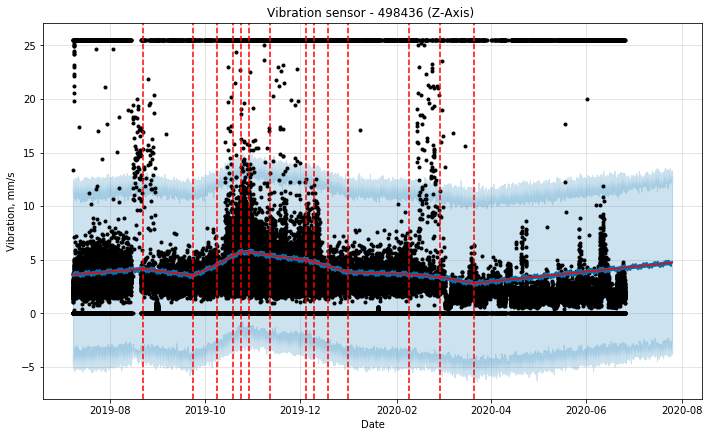

In [12]:
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(),model,forecast_data) #Automatic changepoint detection
plt.title('Vibration sensor - 498436 (Z-Axis) ')
plt.ylabel('Vibration, mm/s')
plt.xlabel('Date')

In [ ]:
model.plot_components(forecast_data)

In [ ]:
metric_df = forecast_data.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [ ]:
metric_df.tail()

In [ ]:
metric_df.dropna(inplace=True)

In [ ]:
metric_df.tail()

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

In [ ]:
#forecast_data.to_excel('Taste_Garden_Updated forecast_data2.xlsx') #export data into excel#

In [ ]:
print(df)

In [ ]:
print(forecast_data)

In [ ]:
df_cv = cross_validation(model,horizon = '43 days')
df_cv.head()
model.plot(df_cv)

In [ ]:
print(df_cv)